In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten



In [9]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [11]:
red.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [14]:
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
922,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
125,9.0,0.620,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
562,9.0,0.540,0.49,2.9,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,5
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7


In [15]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


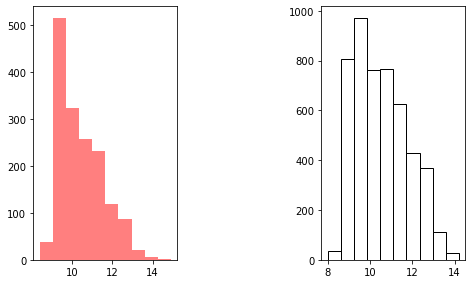

In [49]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor = "red",  alpha=0.5, label = 'Red Wine')
ax[1].hist(white.alcohol, 10, facecolor = "white", ec='black',  label = 'White Wine')
fig.subplots_adjust(left = 0,  right = 1, bottom = 0, hspace = 0.02, wspace = 1)


In [54]:
# Adding Type to the wine
red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)


In [55]:
wine.shape

(6497, 13)

In [56]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [70]:
X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)

In [71]:
X_train , X_test ,y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 42  )

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1717,7.2,0.310,0.50,13.30,0.056,68.0,195.0,0.99820,3.01,0.47,9.2
1392,7.1,0.620,0.06,1.30,0.070,5.0,12.0,0.99420,3.17,0.48,9.8
4864,4.2,0.215,0.23,5.10,0.041,64.0,157.0,0.99688,3.42,0.44,8.0
2890,7.5,0.230,0.32,9.20,0.038,54.0,191.0,0.99660,3.04,0.56,9.7
489,9.3,0.390,0.40,2.60,0.073,10.0,26.0,0.99840,3.34,0.75,10.2
...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5


In [162]:
model = Sequential()

In [163]:
model.add(Flatten())
model.add(Dense(units = 10 , activation  = 'relu'))
model.add(Dense(units = 14 , activation = 'relu'))
model.add(Dense(units = 1 ,activation = 'sigmoid'))

In [164]:
model.compile( loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'] )

In [165]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 8, batch_size = 1, verbose = 1)

Epoch 1/8
4288/4288 [==============================] - 8s 2ms/step - loss: 0.2576 - accuracy: 0.9209 - val_loss: 0.2992 - val_accuracy: 0.9199
Epoch 2/8
4288/4288 [==============================] - 6s 2ms/step - loss: 0.2005 - accuracy: 0.9272 - val_loss: 0.1798 - val_accuracy: 0.9339
Epoch 3/8
4288/4288 [==============================] - 6s 1ms/step - loss: 0.1658 - accuracy: 0.9410 - val_loss: 0.2804 - val_accuracy: 0.8732
Epoch 4/8
4288/4288 [==============================] - 7s 2ms/step - loss: 0.1332 - accuracy: 0.9545 - val_loss: 0.1628 - val_accuracy: 0.9502
Epoch 5/8
4288/4288 [==============================] - 8s 2ms/step - loss: 0.1164 - accuracy: 0.9641 - val_loss: 0.1089 - val_accuracy: 0.9647
Epoch 6/8
4288/4288 [==============================] - 9s 2ms/step - loss: 0.0982 - accuracy: 0.9667 - val_loss: 0.1018 - val_accuracy: 0.9665
Epoch 7/8
4288/4288 [==============================] - 8s 2ms/step - loss: 0.0933 - accuracy: 0.9708 - val_loss: 0.1112 - val_accuracy: 0.9660

In [177]:

accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(len(accuracy))

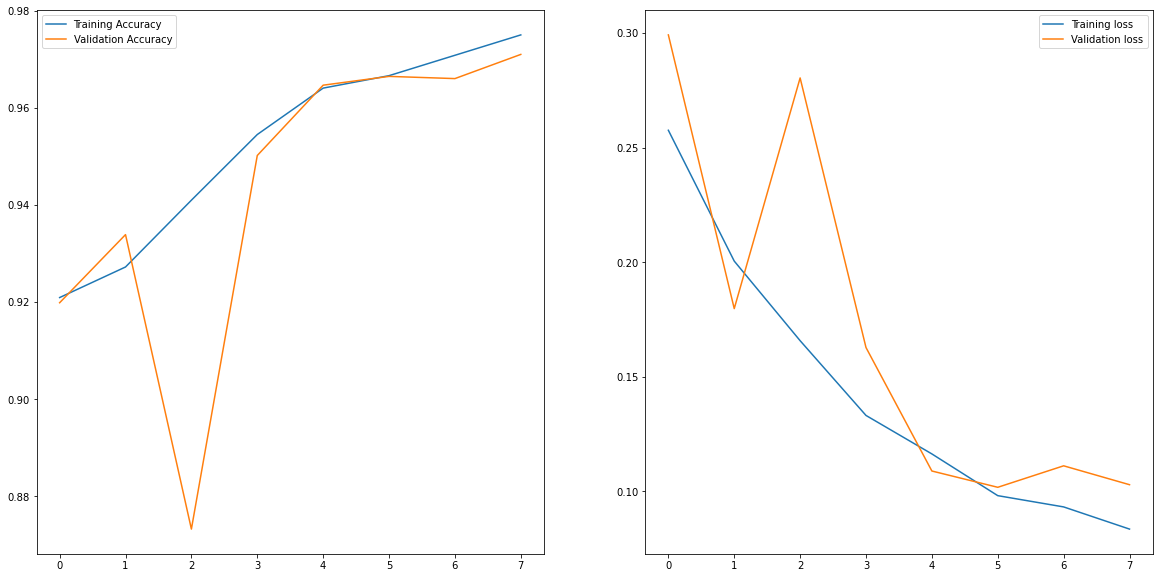

In [192]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(epochs, accuracy,label = 'Training Accuracy')
plt.plot(epochs, validation_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'upper left')

plt.subplot(1,2,2)
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, validation_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.show()

In [202]:
test_data = np.array([7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]).reshape(1,11)

test_data.shape

model.predict(test_data)

array([[0.99934757]], dtype=float32)